# ADVANCED REGRESSION ASSIGNMENT

## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## House Price Prediction - Assignment Solution

**The below mentioned steps will be performed as part of this assignment**

1. Data reading 

2. Data understanding 
    - Routine data check
    - Data quality check, missing value analysis and duplicate rows check
    - Data Visualisation and EDA

3. Data cleaning
   
4. Data preparation

5. Model building and evaluation




# IMPORTING NECESSARY LIBRARIES 


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

import os

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display aLL rows and columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# DATA READING

In [3]:
# Reading data from train.csv file.

data=pd.read_csv("train.csv")

In [4]:
# printing first 5 rows to check if data is read properly.
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# DATA UNDERSTANDING

## ROUTINE DATASET CHECK

In [5]:
print(data.columns) ##inspecting the columns
print(data.shape) ##inspecting the shape
print(data.dtypes) ##inspecting the datatypes of variables
print(type(data)) ##inspecting the variable on train dataset.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
##further inspecting the datasets
print(data.info()) ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(data.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## DATA QUALITY CHECK AND MISSING VALUE ANALYSIS.

In [7]:
#Percentage of missing values in each column.
nullseries = round(data.isnull().sum() * 100 / len(data),2)
print(nullseries)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
#  code for row-wise null count here
print(data.isnull().sum(axis=1))

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
30       3
31       5
32       5
33       4
34       4
35       4
36       5
37       4
38       5
39      15
40       3
41       4
42       5
43       5
44       5
45       4
46       4
47       5
48      10
49       4
50       6
51       2
52       5
53       4
54       3
55       4
56       4
57       5
58       4
59       4
60       5
61       5
62       4
63       4
64       5
65       4
66       5
67       5
68       5
69       4
70       4
71       5
72       4
73       4
74       5
75       4
76       6
77       4
78      10
79       3
80       4
81       5
82       4
83       5
84       4
85       4
86       4
87       4
88       9
89      10
90      10

In [9]:
## Checking columns having null values

print(nullseries[nullseries > 0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [10]:
##Checking columns having null value greater than or equal to 45%
print(nullseries[nullseries >= 45])

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64


In [11]:
#Checking number of values in each group
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
#Checking number of values in each group
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
#Checking number of values in each group
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

No values in TA	-Average/Typical category for PoolQC column


In [14]:
#Checking number of values in each group
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [15]:
#Checking number of values in each group
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

No values in  Elev-Elevator category for MiscFeature columnm

 Eventhough the missing value percentage is >=45 for below columns, all the missing values seems to be meaningful. 

- Alley          - 93.77%  -   NaN refers to NA which means No alley access
- FireplaceQu    - 47.26%  -   NaN refers to NA which means No Fireplace
- PoolQC         - 99.52%  -   NaN refers to NA which means No Pool
- Fence          - 80.75%  -   NaN refers to NA which means No No Fence
- MiscFeature    - 96.30%  -   NaN refers to NA which means None

**So, we are not going to drop those columns**

***NaN in Alley,FireplaceQu,PoolQC,Fence,MiscFeature categorical columns have to be replaced with correspnding value given as per data dictionary.***



Let's analyze missing values for these columns also:

- LotFrontage     : 17.74 %
- MasVnrType       : 0.55 %
- MasVnrArea       : 0.55 %
- BsmtQual         : 2.53 %
- BsmtCond         : 2.53 %
- BsmtExposure     : 2.60 %
- BsmtFinType1     : 2.53 %
- BsmtFinType2     : 2.60 %
- Electrical       : 0.07 %
- GarageType       : 5.55 %
- GarageYrBlt      : 5.55 %
- GarageFinish     : 5.55 %
- GarageQual       : 5.55 %
- GarageCond       : 5.55 %


In [16]:
#describe column's mean,std,min,25%,50%,75%,max
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotFrontage is numerical column. We should impute these missng values

In [17]:
#Checking number of values in each group
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

"MasVnrType" have some NA which are meaningless.Also when we note , there is no "Cinder Block"  Masonry veneer type.
We have to impute the missing values in this categorical column.

In [18]:
#describe column's mean,std,min,25%,50%,75%,max
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

"MasVnrType" have some NA which are meaningless.So we have to treat the missing values in this columns.

It is numerical column. We should impute this column also.

In [19]:
#Checking number of values in each group
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

BsmtQual         : 2.53 % - NaN refers to NA which means No Basement
So, we are not going to drop this column.NaN BsmtQual categorical columns have to be replaced with No Basement.

In [20]:
#Checking number of values in each group
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

BsmtCond         : 2.53 % - NaN refers to NA which means No Basement
So, we are not going to drop this column.NaN BsmtQual categorical columns have to be replaced with No Basement.

In [21]:
#Checking number of values in each group
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

BsmtExposure         : 2.60 % - NaN refers to NA which means No Basement
So, we are not going to drop this column.NaN BsmtExposure categorical columns have to be replaced with No Basement.

In [22]:
#Checking number of values in each group
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

BsmtFinType1         : 2.53 % - NaN refers to NA which means No Basement
So, we are not going to drop this column.NaN BsmtFinType1 categorical columns have to be replaced with NA.

In [23]:
#Checking number of values in each group
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

BsmtFinType2         : 2.60 % - NaN refers to NA which means No Basement
So, we are not going to drop this column.NaN BsmtFinType2 categorical columns have to be replaced with NA.

In [24]:
#Checking number of values in each group
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Electrical         : 0.07 % - NaN refers to missing value.1 record alone have missed column.
    
So we have to impute the missing values in this categorical column.
    

In [25]:
#Checking number of values in each group
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [26]:
#describe column's mean,std,min,25%,50%,75%,max
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [27]:
#Checking number of values in each group
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [28]:
#Checking number of values in each group
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [29]:
#Checking number of values in each group
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

- GarageType       : 5.55 % -  NaN refers to NA which means No Garage
- GarageYrBlt      : 5.55 % -  NaN refers to NA which means No Garage.We can drop this column
- GarageFinish     : 5.55 % -  NaN refers to NA which means No Garage
- GarageQual       : 5.55 % -  NaN refers to NA which means No Garage
- GarageCond       : 5.55 % -  NaN refers to NA which means No Garage


**Quick summary about the ways to handle missing values:**

For categorical columns:

1. "NaN" in Alley,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
GarageType,GarageFinish,GarageQual,GarageCond categorical columns have to be replaced with NA's mapping as per data dictionary as they are meaningful.


2. MasVnrType(0.55%) and Electrical(0.07%) are categorical columns which have NaN.We have to impute the missing values in these categorical columns with mode as they are meaningless.


For Numerical columns:

1. GarageYrBlt (5.55%) is a numerical column."NaN" refers to NA which means No Garage.We can drop that column


2. LotFrontage (17.74%), MasVnrArea(0.55%) are numerical columns with missing values.We can impute the  missing values with IterativeImputer.


## HANDLING MISSING VALUE IN CATEGORICAL COLUMNS

#### 1.Replacing meaningful NA with respective group as per data dictionary

"NaN" in Alley,FireplaceQu,PoolQC,Fence,MiscFeature,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
GarageType,GarageFinish,GarageQual,GarageCond categorical columns have to be replaced with NA's mapping as per data dictionary as they are meaningful.

In [30]:
data['Alley'].replace(np.nan,'No alley access',inplace=True)

data['FireplaceQu'].replace(np.nan,'No Fireplace',inplace=True)

data['PoolQC'].replace(np.nan,'No Pool',inplace=True)

data['Fence'].replace(np.nan,'No Fence',inplace=True)

data['MiscFeature'].replace(np.nan,'None',inplace=True)

data['BsmtQual'].replace(np.nan,'No Basement',inplace=True)

data['BsmtCond'].replace(np.nan,'No Basement',inplace=True)

data['BsmtExposure'].replace(np.nan,'No Basement',inplace=True)

data['BsmtFinType1'].replace(np.nan,'No Basement',inplace=True)

data['BsmtFinType2'].replace(np.nan,'No Basement',inplace=True)

data['GarageType'].replace(np.nan,'No Garage',inplace=True)

data['GarageFinish'].replace(np.nan,'No Garage',inplace=True)

data['GarageQual'].replace(np.nan,'No Garage',inplace=True)

data['GarageCond'].replace(np.nan,'No Garage',inplace=True)


In [31]:
#Checking number of values in each group
data['GarageCond'].value_counts(normalize=True)

TA           0.908219
No Garage    0.055479
Fa           0.023973
Gd           0.006164
Po           0.004795
Ex           0.001370
Name: GarageCond, dtype: float64

In [32]:
#Checking number of values in each group
data['GarageFinish'].value_counts(normalize=True)

Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

#### 2.MasVnrType(0.55%) and Electrical(0.07%) are categorical columns which have NaN.We have to impute the missing values in these categorical columns with mode as they are meaningless.

In [33]:
#Checking number of values in each group
data['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [34]:
#Replace NaN with "None"
data['MasVnrType'].replace(np.nan,'None',inplace=True)

In [35]:
#Checking number of values in each group
data['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [36]:
#Checking number of values in each group
data['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [37]:
#Replacing NaN values
data['Electrical'].replace(np.nan,'SBrkr',inplace=True)

In [38]:
#Checking number of values in each group
data['Electrical'].value_counts(normalize=True)

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

## HANDLING MISSING VALUES IN NUMERICAL COLUMNS

#### 1. GarageYrBlt (5.55%) is a numerical column."NaN" refers to NA which means No Garage.Since,the information about when garage is build seems to be less important, we can drop that column

In [39]:
#Dropping GarageYrBlt column
data.drop('GarageYrBlt',axis=1,inplace=True)


#### 2.LotFrontage (17.74%), MasVnrArea(0.55%) are numerical columns with missing values.Imputing missing values with IterativeImputer.

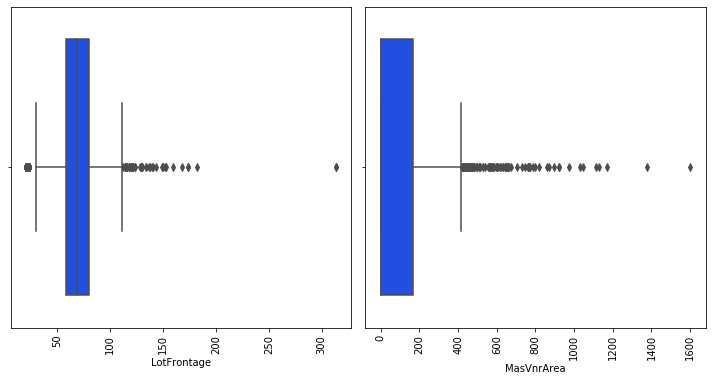

In [40]:
#Plotting the columns again to visualize after capping
numerical_columns=['LotFrontage','MasVnrArea']

plt.figure(figsize = (10, 10))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = data)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [41]:
#describe column's mean,std,min,25%,50%,75%,max
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [42]:
#describe column's mean,std,min,25%,50%,75%,max
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [43]:
#Missing Values
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
it = IterativeImputer(estimator=LinearRegression())
data['LotFrontage'] = pd.DataFrame(it.fit_transform(data['LotFrontage'].values.reshape(-1,1)))
data['MasVnrArea'] = pd.DataFrame(it.fit_transform(data['MasVnrArea'].values.reshape(-1,1)))

In [44]:
#Checking after imputing missing values
#describe column's mean,std,min,25%,50%,75%,max
data['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [45]:
#Checking after imputing missing values
#describe column's mean,std,min,25%,50%,75%,max
data['MasVnrArea'].describe()

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

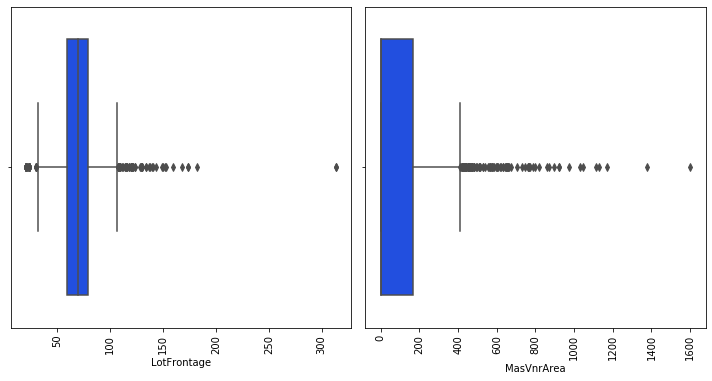

In [46]:
#Plotting the columns again to visualize after capping
numerical_columns=['LotFrontage','MasVnrArea']

plt.figure(figsize = (10, 10))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = data)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [47]:
#Percentage of missing values in each column.
nullseries = round(data.isnull().sum() * 100 / len(data),2)
print(nullseries)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

In [48]:
#  code for row-wise null count here
print(data.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [49]:
data.shape

(1460, 80)

**There are no missing values in data set**.

In [50]:
# Duplicates check - Checking for any duplicates in the data.
data.loc[data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

**There are no duplicates in our dataset.**

# DATA VISUALISATION

## EDA

Note : Below piece of codes that generates the pair plots and heatmap take sometime to execeute

### Univariate Analysis of Categorical Columns

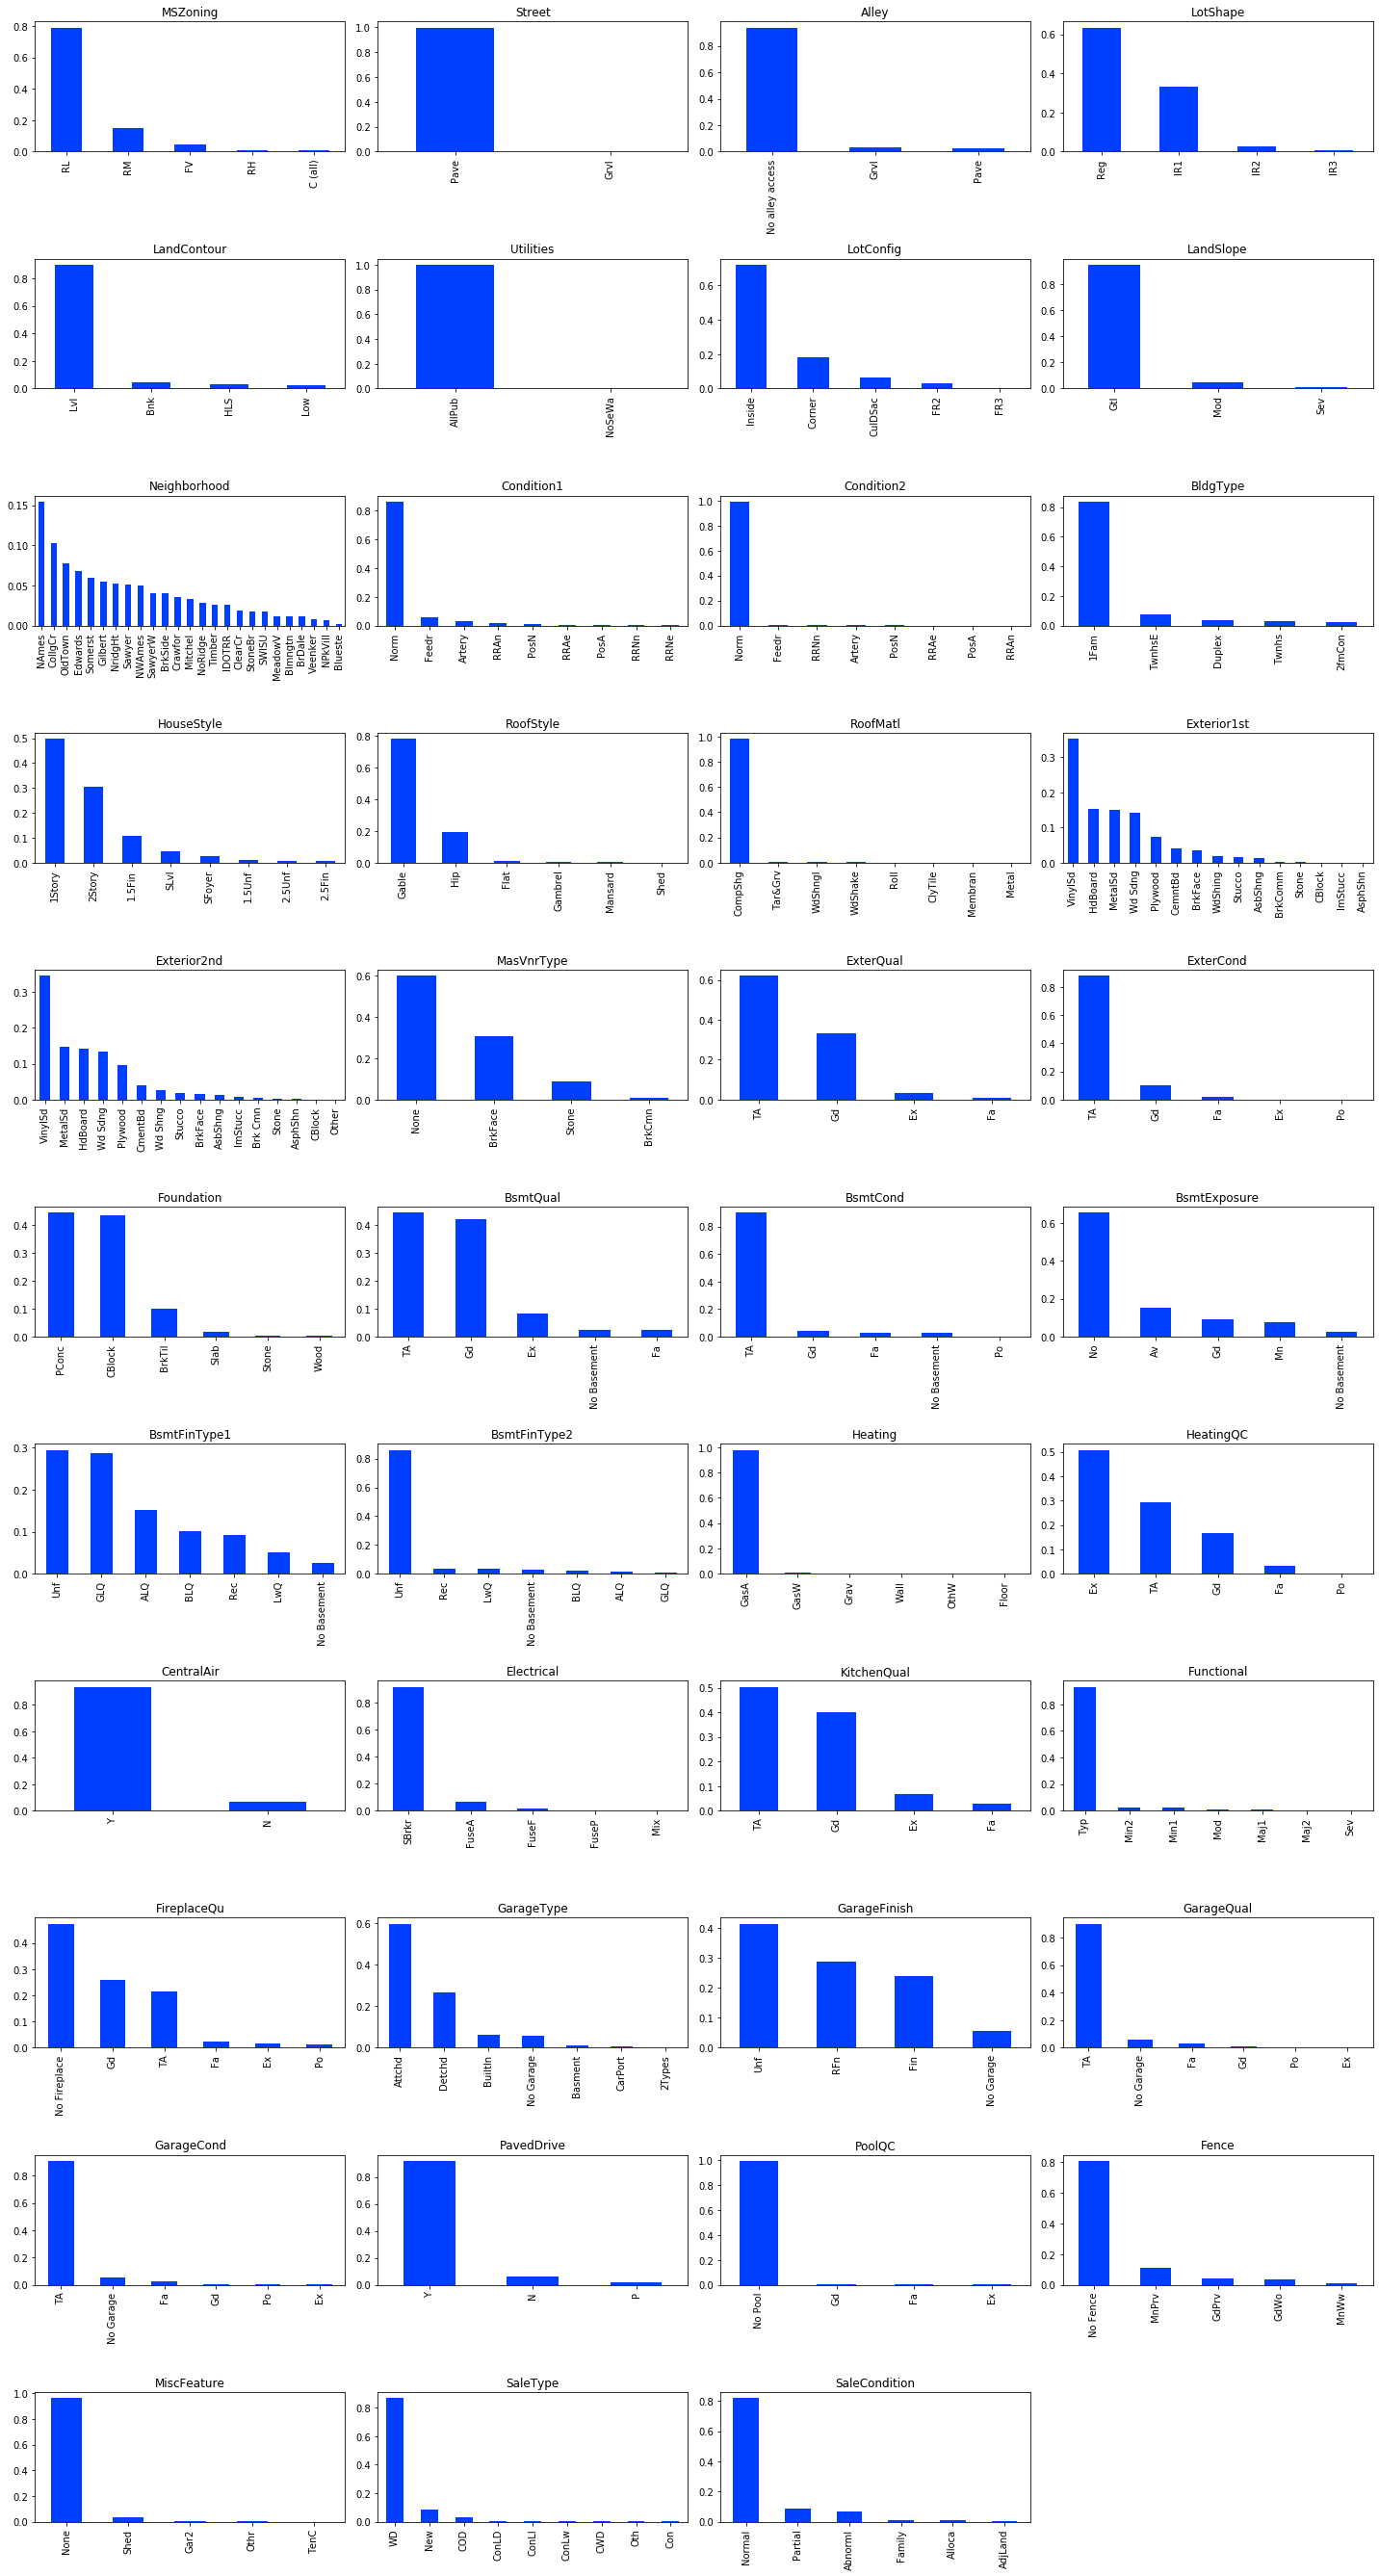

In [51]:
categorical_columns=['MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC','Fence', 'MiscFeature', 'SaleType','SaleCondition']


sns.set_palette("bright")

plt.figure(figsize = (20,40))

for col in enumerate(categorical_columns):
    plt.subplot(12, 4, col[0]+1)
    plt.title(col[1])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    data[col[1]].value_counts(normalize=True).plot.bar()


**Quick Summary of Univariate categorical columns:**

1. Most of the houses don't have alley access,streets are paved mostly with Gable Roofstyle. 


2. Majority of houses have Average/Typical quality of the material on the exterior. 


3. The basement quality is also Typical(80-89 inches) for majority of houses.


4. The majority of houses have Excellent Heating quality and condition wheras average kitchen,garage quality and mostly don't have fireplace.


5. Apart from that,We can see that the below mentioned columns are higly skewed:
    
  - Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,
    BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,
    MiscFeature,SaleType,SaleCondition
  

6. The below mentioned columns seems to have lot of groups which can be combined:

  - MSZoning,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType
  

7. Ordinal columns to do hot encoding:
    
  - ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,BsmtExposure


### Univariate Analysis of numerical columns

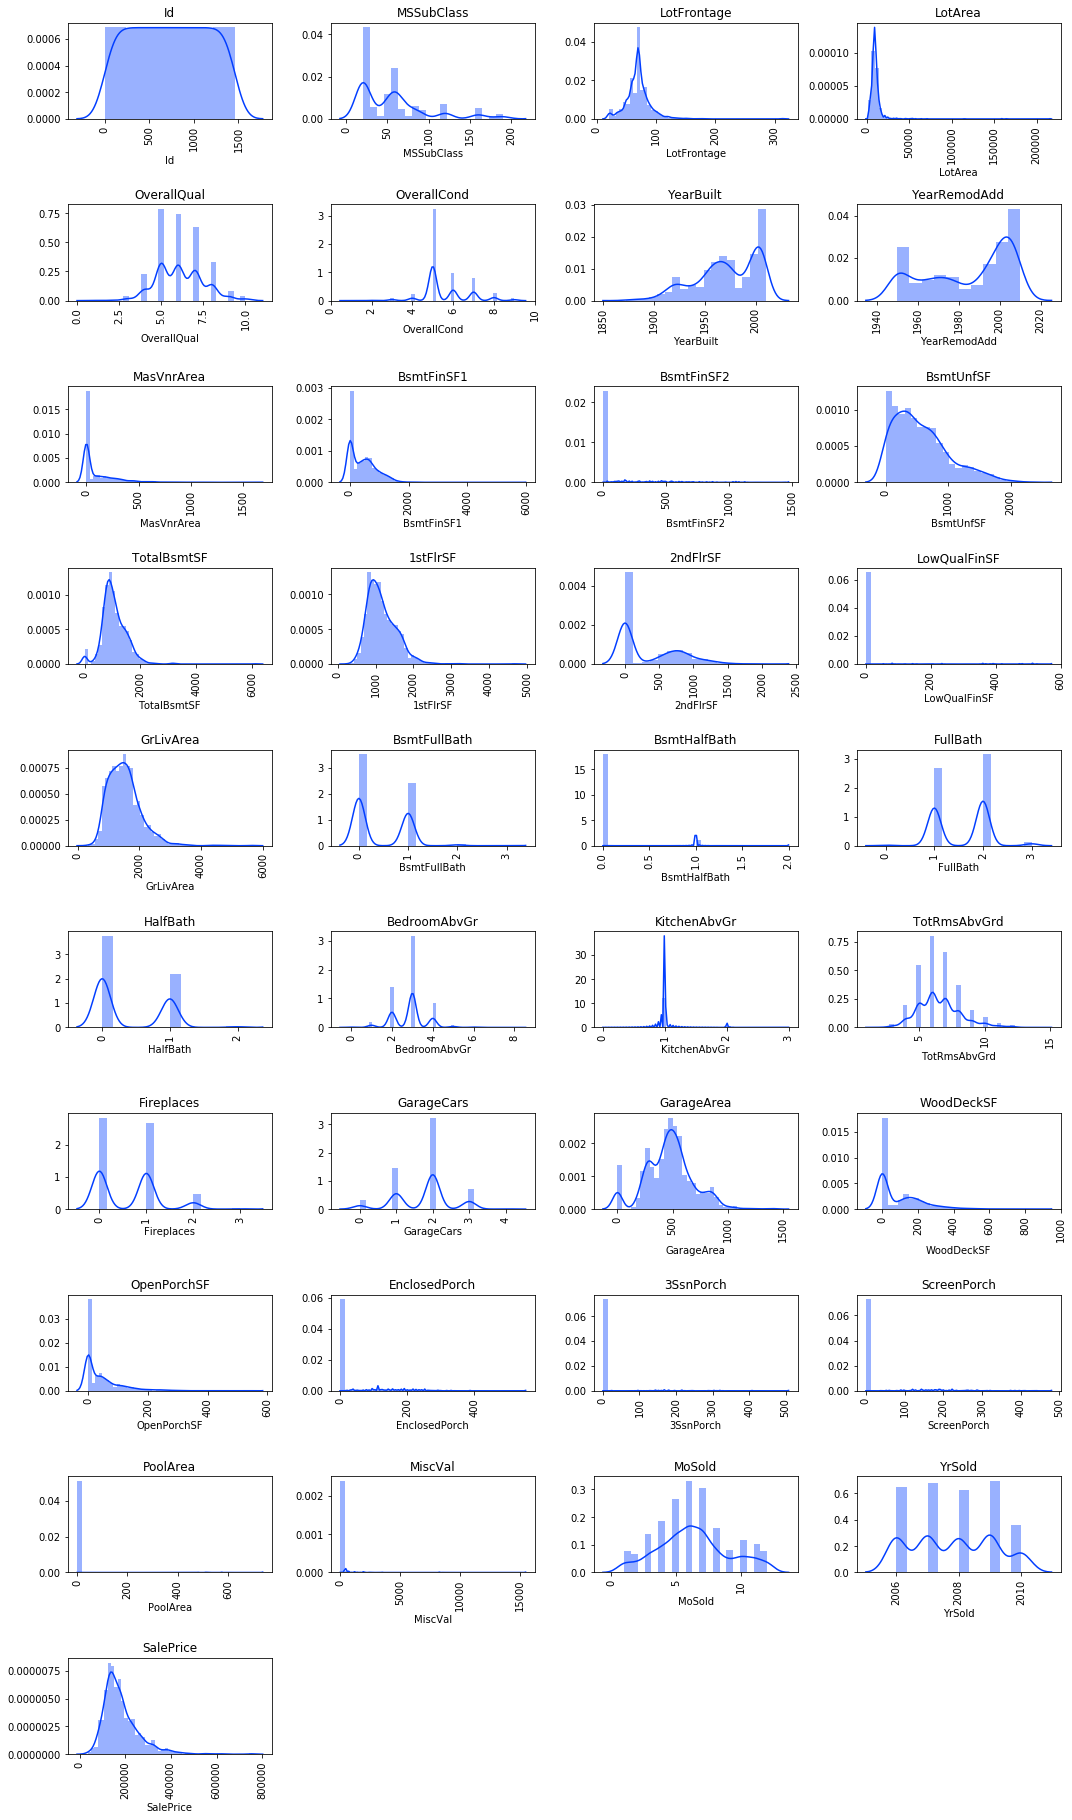

In [52]:
numerical_columns=['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

plt.figure(figsize = (15, 25))

for col in enumerate(numerical_columns):
    plt.subplot(10, 4, col[0]+1)
    plt.title(col[1])
    sns.distplot(data[col[1]], hist =True) #BLUE
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Quick Summary from univariate analyis of numerical columns:**
    
1. OverallQual of houses seems to be 5.Many houses seems to have rating between 5 to 7.5
2. OverallCond have 5 as most frequently occuring ratings.
3. Majority houses have 3 bedrooms with 1 to 2 Full bathrooms above grade with 1 kitchen above grade
and overall 6 total rooms above grade.
4. Majority houses have space for 2 cars in garage.
5. Target column SalePrice seems to be skewed.

### Bivariate Analysis and  Multivariate Analysis of Numerical Columns

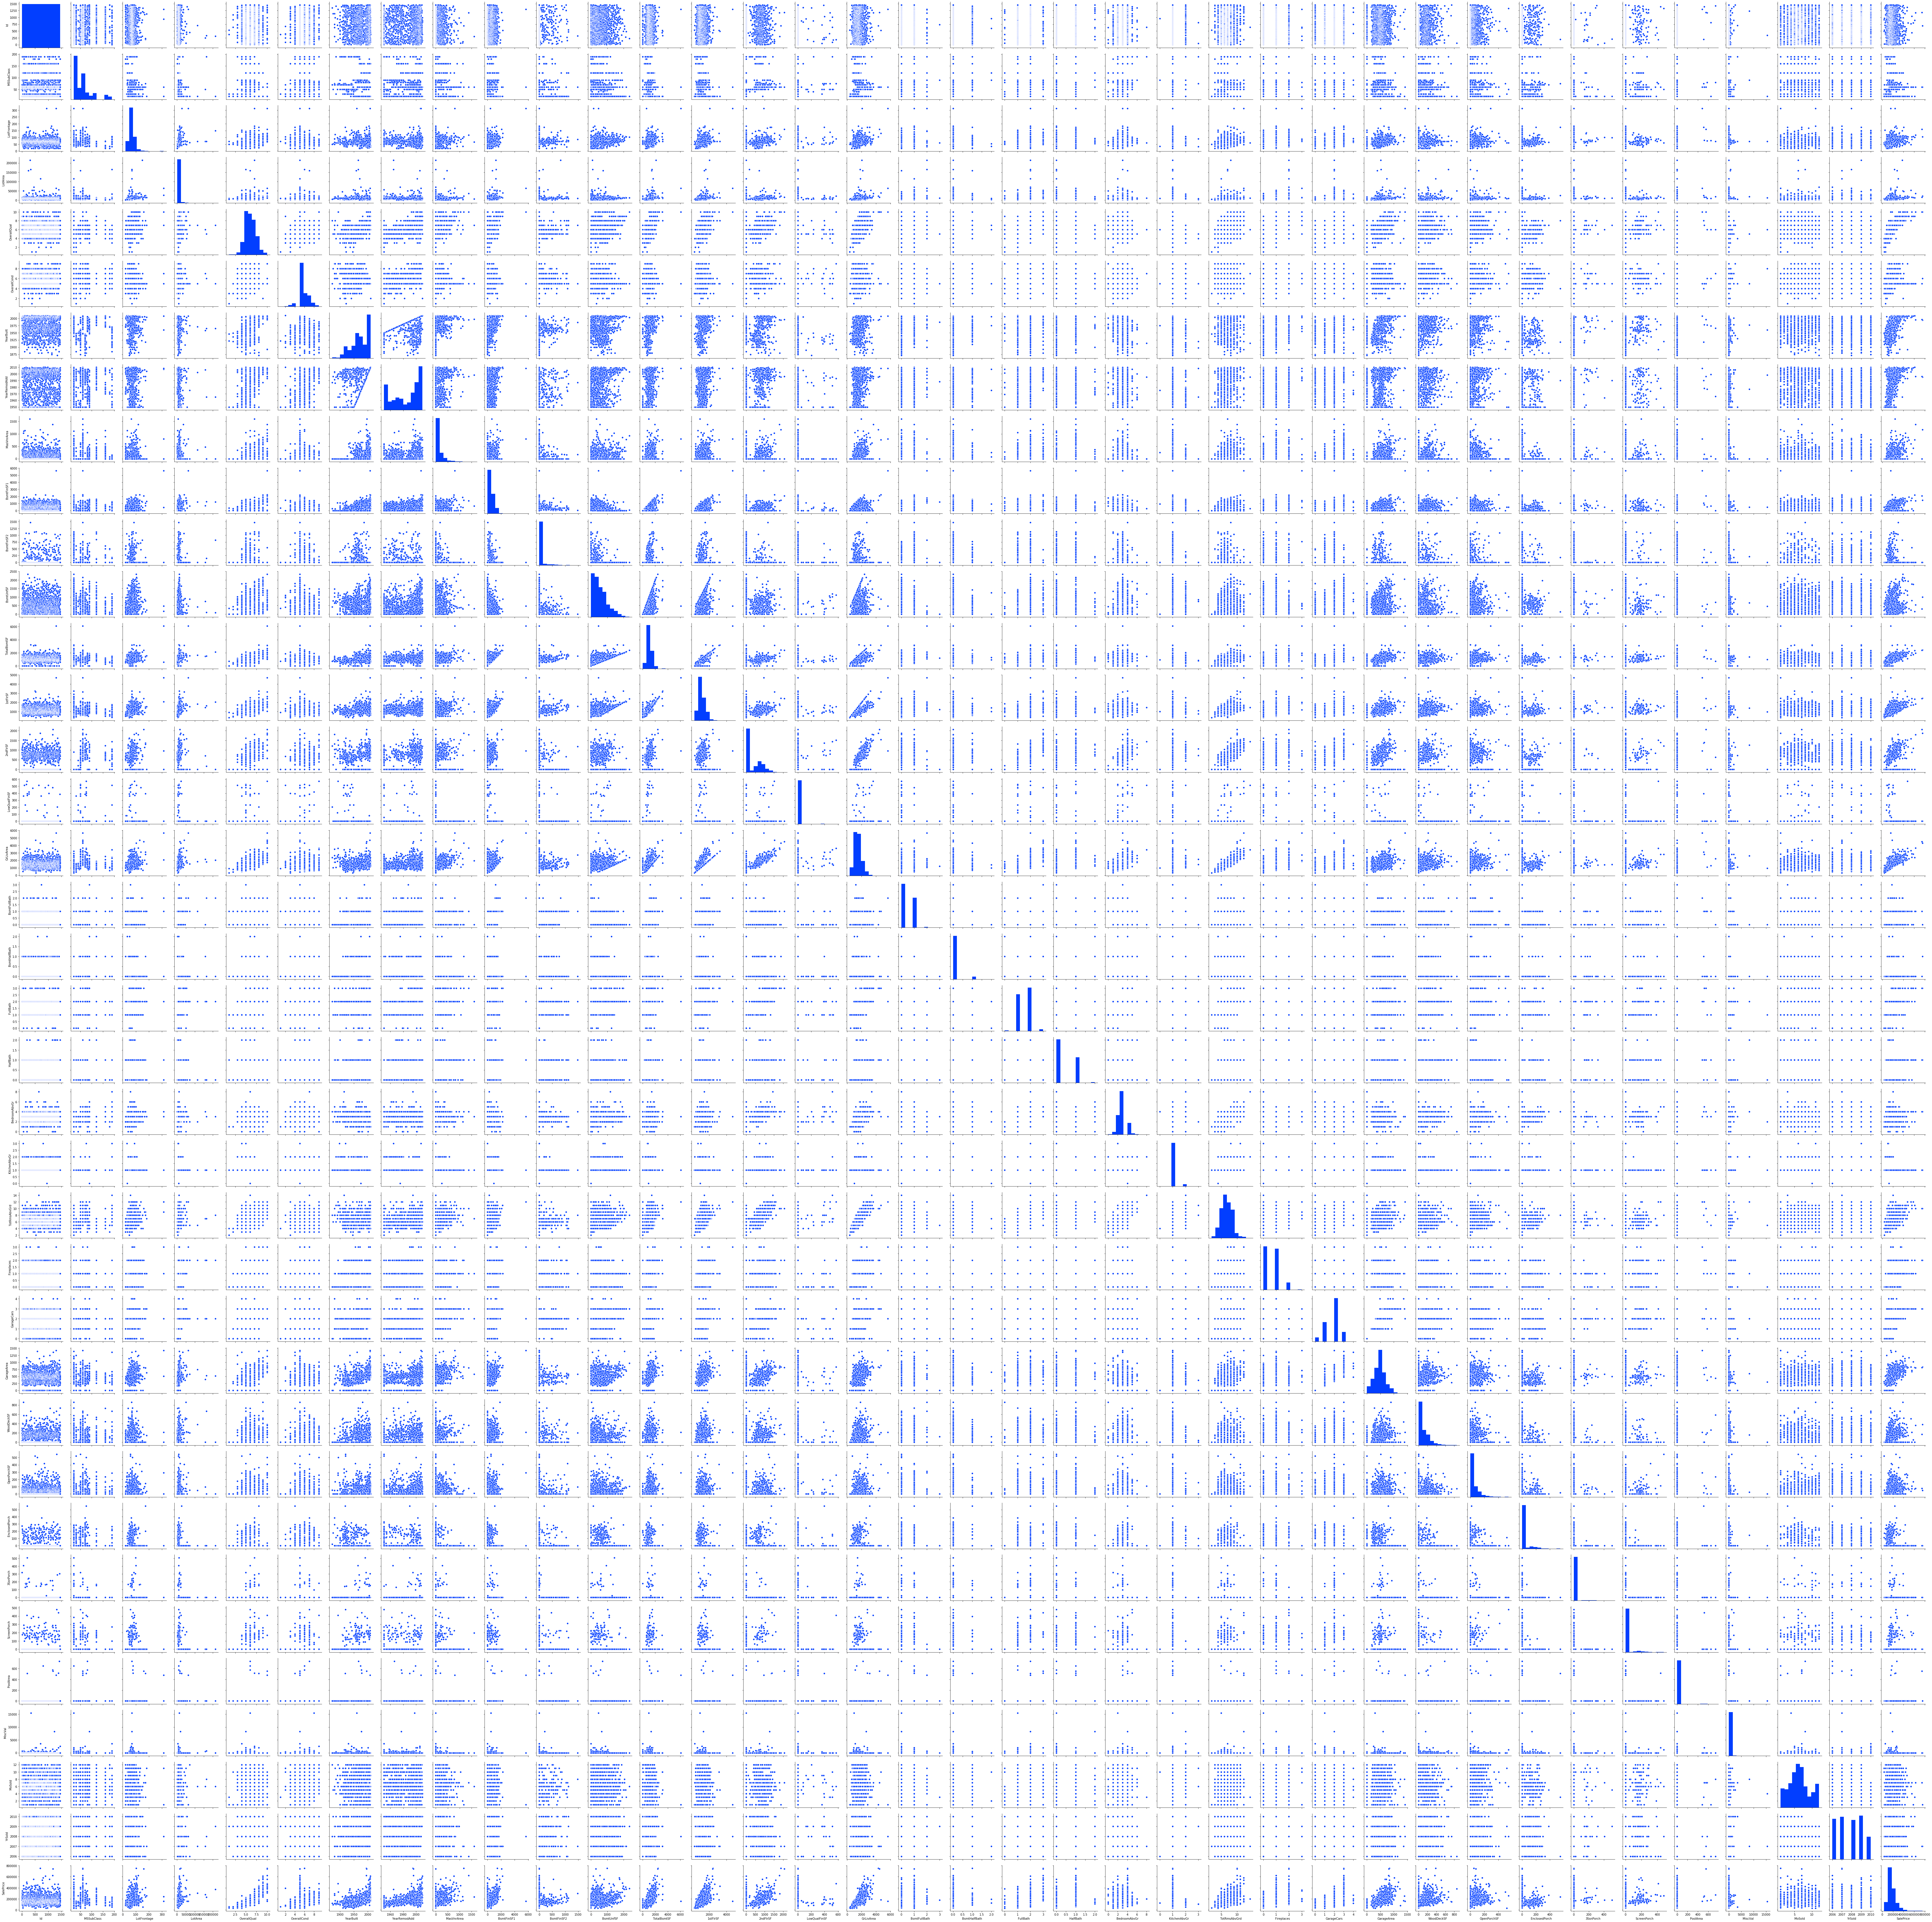

In [53]:
#Let's plot pairplot and see

sns.pairplot(data)
plt.show()

SalePrice seems to have same relationship with YearBuild and YearRemodAdd.

In [54]:
temp= data['YearBuilt']==data['YearRemodAdd']
temp=data[temp]

print(temp.shape[0]/data.shape[0])

0.5232876712328767


**From above, we can see that 52% of houses were not remodelled again after building. And 48% of houses are remodelled.**

(37.0, 0.0)

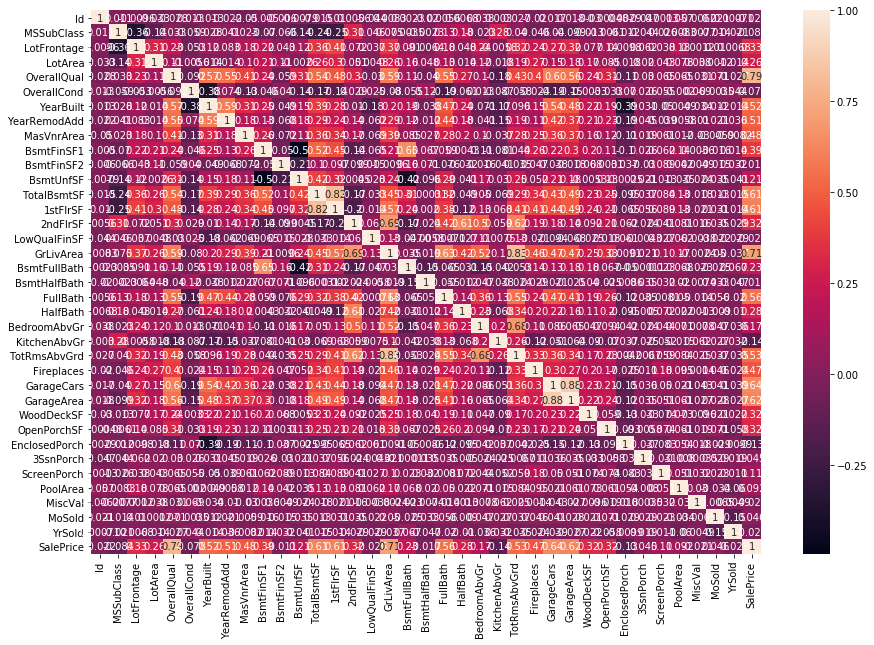

In [55]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Quick summary from Bivariate Analysis and  Multivariate Analysis of Numerical Columns:**

1. SalePrice is strongly positively correlated to OverallQuality,GrLivArea of house.
2. Garage Car and GarageArea are highly positively correlated
3. TotalBsmtSF and 1stFLrSF are also highly positively correlated
4. SalePrice have poorly correlated with MoSold,YrSold.So,we can drop those columns.
5. We can see that 52% of houses were not remodelled again after building. And 48% of houses were remodelled.

## DATA CLEANING

1. Deriving Age,Remodelled_Age columns from YearBuilt and YearRemodAdd columns respectively and then drop YearBuilt,YearRemodAdd.


2. Dropping MoSold,YrSold columns(SalePrice are poorly correlated with MoSold,YrSold).


3. We are going to drop highly skewed categorical columns.

  - Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,BsmtFinType2,       Heating,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,
    MiscFeature,SaleType,SaleCondition
    
  
4. We are going to create groups of categories to reduce number of categories.We are going to combine groups having low percentages into one single group.

  - MSZoning,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType
  

5. Transforming SalePrice column to Normally distributed column.

#### 1. Deriving Age,Remodelled_Age columns from YearBuilt and YearRemodAdd columns respectively

In [56]:
#Finding current year. we can directly initialize as 2020 also.
from datetime import datetime
today = datetime.today()


In [57]:
data.head() #Print first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1          60       RL         65.0     8450   Pave  No alley access   
1   2          20       RL         80.0     9600   Pave  No alley access   
2   3          60       RL         68.0    11250   Pave  No alley access   
3   4          70       RL         60.0     9550   Pave  No alley access   
4   5          60       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1      

In [58]:
#Deriving Age,Remodelled_Age from YearBuilt and YearRemodAdd by subtracting it from current year 2020
data['Age']= today.year-data['YearBuilt']
data['Remodelled_Age']=today.year-data['YearRemodAdd']

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1          60       RL         65.0     8450   Pave  No alley access   
1   2          20       RL         80.0     9600   Pave  No alley access   
2   3          60       RL         68.0    11250   Pave  No alley access   
3   4          70       RL         60.0     9550   Pave  No alley access   
4   5          60       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1      

In [59]:
data.shape

(1460, 82)

#### 2.Dropping year related columns

In [60]:
#Dropping year related columns

data.drop(['YearBuilt','YearRemodAdd','MoSold','YrSold'],axis=1,inplace=True)

In [61]:
data.shape

(1460, 78)

In [62]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1          60       RL         65.0     8450   Pave  No alley access   
1   2          20       RL         80.0     9600   Pave  No alley access   
2   3          60       RL         68.0    11250   Pave  No alley access   
3   4          70       RL         60.0     9550   Pave  No alley access   
4   5          60       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd             7        Typ     

#### 3. We are going to drop highly skewed categorical columns.

  - Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,BsmtFinType2,     Heating,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition

In [63]:
data.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating', 'CentralAir','Electrical','Functional','GarageQual','GarageCond',
            'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [64]:
data.shape

(1460, 54)

In [65]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
1        Ex      1262         0             0       1262             0   
2        Ex       920       866             0       1786             1   
3        Gd       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType GarageFinish  GarageCars  \
0             8           0  No Fireplace     Attchd          RFn           2   
1             6           1            TA     Attchd          RFn           2   
2             6           1            TA     Attchd          RFn           2   
3             7           1            Gd     Detchd          Unf           3   
4             9           1            TA     Attchd          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  Age  Remodelled_Age  
0         0        0     208500   17              17  
1         0        0     181500   44              44  
2         0        0     223500   19              18  
3         0        0     140000  105              50  
4         0        0     250000   20            

#### 4. We are going to create groups of categories to reduce number of categories.We are going to combine groups having low percentages into one single group.

  - MSZoning,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType

In [66]:
#Checking number of values in each group
data['MSZoning'].value_counts(normalize=True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [67]:
# Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
data['MSZoning'] = data['MSZoning'].replace(['RH','C (all)'] ,'Others')

In [68]:
#Checking number of values in each group after combining few groups
data['MSZoning'].value_counts(normalize=True)

RL        0.788356
RM        0.149315
FV        0.044521
Others    0.017808
Name: MSZoning, dtype: float64

*The same procedure is followed for remaining columns : Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType*

In [69]:
data['Neighborhood'].value_counts(normalize=True)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [70]:
#Combining categories < 2%  into 'Others'

data['Neighborhood']=data['Neighborhood'].replace(['ClearCr','StoneBr','SWISU','Blmngtn',
                                                   'MeadowV','BrDale','Veenker','NPkVill','Blueste'],'Others')    

In [71]:
data['Neighborhood'].value_counts(normalize=True)

NAmes      0.154110
Others     0.102740
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
Name: Neighborhood, dtype: float64

In [72]:
data["HouseStyle"].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

In [73]:
# Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
data["HouseStyle"]=data["HouseStyle"].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [74]:
data["HouseStyle"].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
Others    0.047945
SLvl      0.044521
Name: HouseStyle, dtype: float64

In [75]:
data['RoofStyle'].value_counts(normalize=True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [76]:
#Combining categories < 1%  into 'Others'
data["RoofStyle"]=data["RoofStyle"].replace(['Flat','Gambrel','Mansard','Shed'],'Others')

In [77]:
data['RoofStyle'].value_counts(normalize=True)

Gable     0.781507
Hip       0.195890
Others    0.022603
Name: RoofStyle, dtype: float64

In [78]:
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
CBlock     0.000685
ImStucc    0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64

In [79]:
#Combining categories < 1%  into 'Others'
data['Exterior1st']=data['Exterior1st'].replace(['WdShing','Stucco','AsbShng',
                                                 'BrkComm','Stone','ImStucc','CBlock','AsphShn'],'Others')

In [80]:
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
Others     0.053425
CemntBd    0.041781
BrkFace    0.034247
Name: Exterior1st, dtype: float64

In [81]:
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [82]:
#Combining categories < 1%  into 'Others'
data['Exterior2nd']=data['Exterior2nd'].replace(['Stucco','BrkFace','AsbShng',
                                                 'Brk Cmn','Stone','ImStucc','CBlock','AsphShn','Other'],'Others')

In [83]:
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
Others     0.067123
CmentBd    0.041096
Wd Shng    0.026027
Name: Exterior2nd, dtype: float64

In [84]:
data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [85]:
#Combining categories < 2%  into 'Others'
data['Foundation']=data['Foundation'].replace(['Slab','Stone','Wood'],'Others')

In [86]:
data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Others    0.022603
Name: Foundation, dtype: float64

In [87]:
data['GarageType'].value_counts(normalize=True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

In [88]:
#Combining categories < 2%  into 'Others'
data['GarageType']=data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

In [89]:
data['GarageType'].value_counts(normalize=True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Others       0.023288
Name: GarageType, dtype: float64

In [90]:
data.shape

(1460, 54)

#### 5. Transforming SalePrice column to Normally distributed column.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

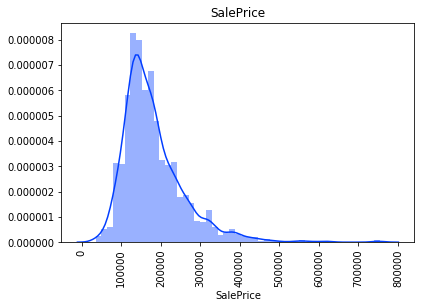

In [91]:
plt.title('SalePrice')
sns.distplot(data['SalePrice'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

**We can see that SalePrice column is higly skewed**

In [92]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data['SalePrice'] = pd.DataFrame(pt.fit_transform(data['SalePrice'].values.reshape(-1,1)))


(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 <a list of 7 Text xticklabel objects>)

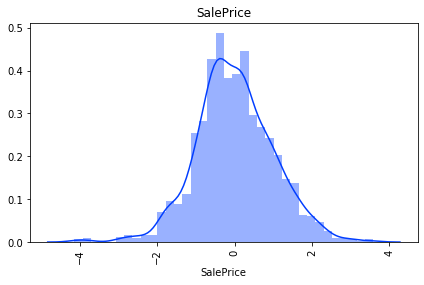

In [93]:
plt.title('SalePrice')
sns.distplot(data['SalePrice'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

**Now, "SalePrice" have normal distribution.**

## DATA PREPARATION

The following steps will be done as part of data preparation.

1. Create dummies for categorical columns
2. Do one hot encoding for ordinal categorical columns : ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,BsmtExposure
3. Perform train-test split
4. Perform Scaling



#### 1.Create dummies for categorical columns

Let's create dummies for below nominal categorical columns:

'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle','Exterior1st', 
'Exterior2nd', 'MasVnrType','Foundation','BsmtFinType1', 'GarageType', 'GarageFinish'

(Since it's one's intutive to segregrate nominal and ordinal categorical variables,I am considering BsmtFinType1 and GarageFinish as nominal categorical and dummifying it.Similarly I am considering 'BsmtExposure' as ordinal categorical column) 


In [94]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle','Exterior1st', 
                     'Exterior2nd', 'MasVnrType','Foundation','BsmtFinType1', 'GarageType', 'GarageFinish']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [95]:
data.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle',
           'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation','BsmtFinType1', 
           'GarageType', 'GarageFinish'],axis=1,inplace=True)

In [96]:
data.shape

(1460, 106)

Rating system(%):
0-No Basement/No Fireplace 1- Poor 2 – Fair 3 – Average 4 – Good 5 – Excellent

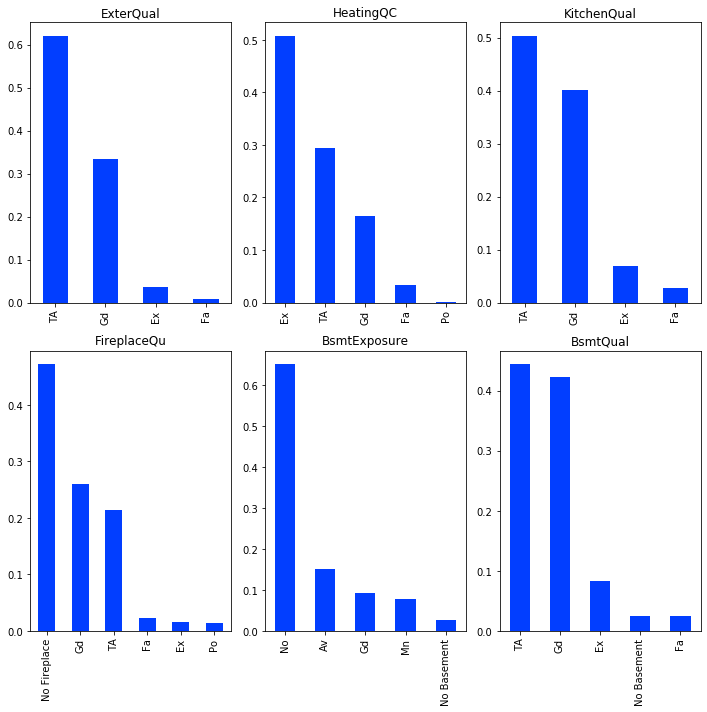

In [97]:
categorical_columns=['ExterQual','HeatingQC','KitchenQual','FireplaceQu','BsmtExposure','BsmtQual']

sns.set_palette("bright")

plt.figure(figsize = (10,10))

for col in enumerate(categorical_columns):
    plt.subplot(2, 3, col[0]+1)
    plt.title(col[1])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    data[col[1]].value_counts(normalize=True).plot.bar()

In [98]:
#Label encoding Ordinal categorical columns
varlist =['ExterQual','HeatingQC','KitchenQual']
def quality_map(x):
  return x.map({'Ex' : 5, "Gd": 4,'TA':3,'Fa':2,'Po':1})

data[varlist] = data[varlist].apply(quality_map)

In [99]:
#Label encoding Ordinal categorical columns
varlist =['BsmtQual']
def bsmt_qual(x):
  return x.map({'Ex' : 5, "Gd": 4,'TA':3,'Fa':2,'Po':1,'No Basement':0})

data[varlist] = data[varlist].apply(bsmt_qual)

In [100]:
#Label encoding Ordinal categorical columns
varlist =['FireplaceQu']
def Fireplace_quality_map(x):
  return x.map({'Ex' : 5, "Gd": 4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

data[varlist] = data[varlist].apply(Fireplace_quality_map)

In [101]:
#Label encoding Ordinal categorical columns
varlist =['BsmtExposure']
def bsmt_exp_map(x):
  return x.map({ "Gd": 4,'Av':3,'Mn':2,'No':1,'No Basement':0})

data[varlist] = data[varlist].apply(bsmt_exp_map)

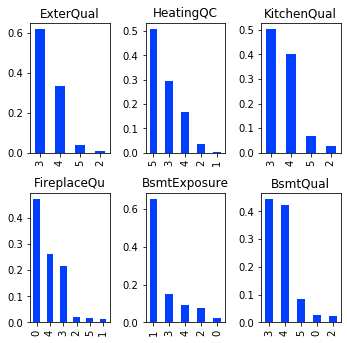

In [102]:
##Checking if values are mapped properly
categorical_columns=['ExterQual','HeatingQC','KitchenQual','FireplaceQu','BsmtExposure','BsmtQual']

sns.set_palette("bright")

plt.figure(figsize = (5,5))

for col in enumerate(categorical_columns):
    plt.subplot(2, 3, col[0]+1)
    plt.title(col[1])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    data[col[1]].value_counts(normalize=True).plot.bar()

In [103]:
data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          4         4             1         706           0        150   
1          3         4             4         978           0        284   
2          4         4             2         486           0        434   
3          3         3             1         216           0        540   
4          4         4             3         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   
2            4             6           1            3           2         608   
3            4             7           1            4           3         642   
4            4             9           1            3           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  Age  Remodelled_Age  MSZoning_Others  MSZoning_RL  \
0        0   0.571155   17              17                0            1   
1        0   0.227627   44              44                0            1   
2        0   0.741869   19              18                0            1   
3        0  -0.425386  105              50                0            1   
4        0   1.015293   20              20                0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
4            0             0             0             0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_CollgCr  \
0              0              0                 1                     1   
1              1              0                 0                     0   
2             

###  **3.Test-Train Data Split**


In [104]:
#Importing the required libraries to divide the data into test data and training data.
from sklearn.model_selection import train_test_split

In [105]:
#Adding all feature columns to X Variable
X = data.drop(['Id','SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          4         4             1         706           0        150   
1          3         4             4         978           0        284   
2          4         4             2         486           0        434   
3          3         3             1         216           0        540   
4          4         4             3         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   
2            4             6           1            3           2         608   
3            4             7           1            4           3         642   
4            4             9           1            3           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  Age  Remodelled_Age  MSZoning_Others  MSZoning_RL  MSZoning_RM  \
0        0   17              17                0            1            0   
1        0   44              44                0            1            0   
2        0   19              18                0            1            0   
3        0  105              50                0            1            0   
4        0   20              20                0            1            0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             0             1                  0              0   
1             0             0             1                  0              1   
2             0             0             0                  0              0   
3             0             0             0                  0              0   
4             0             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_CollgCr  \
0              0                 1                     1   
1              0                 0                     0   
2              0                 1                     1   

In [106]:
X.shape

(1460, 104)

In [107]:
#Adding our target column to Y Variable
y = data['SalePrice']

In [108]:
y.head()

0    0.571155
1    0.227627
2    0.741869
3   -0.425386
4    1.015293
Name: SalePrice, dtype: float64

In [109]:
y.shape

(1460,)

In [110]:
# Splitting the data into train and test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [111]:
#We can see that columns except TotalVisits, Time Spent and Page Views Per Visit all the other columns are present in the range of 0 - 1, so we need to scale these variables as well.
import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

scaler = StandardScaler()


In [112]:
num_col=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'3SsnPorch','ScreenPorch','PoolArea','MiscVal','Remodelled_Age','Age',
'ExterQual','HeatingQC','KitchenQual','FireplaceQu','BsmtExposure','BsmtQual']

X_train[num_col]=scaler.fit_transform(X_train[num_col]) 
X_test[num_col] = scaler.transform(X_test[num_col])

In [113]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.657071    -0.123555 -0.473765    -0.779861     0.383154   -0.560537   
318     0.035976     0.918688 -0.056845     0.649651    -0.533005    0.807462   
239    -0.195040    -0.803279 -0.169324    -0.065105    -1.449164   -0.560537   
986    -0.195040    -0.486074 -0.502297    -0.065105     2.215472   -0.560537   
1416    3.039179    -0.440759  0.082905    -1.494617     0.383154   -0.560537   

      ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210   -0.698260 -0.532226     -0.605626    0.043512   -0.293313  -0.374367   
318    1.053395  0.579028      2.146648    1.160345   -0.293313  -0.454644   
239   -0.698260 -0.532226     -0.605626   -0.761296   -0.293313   0.171964   
986   -0.698260 -0.532226     -0.605626   -0.963574   -0.293313  -0.175904   
1416  -0.698260 -0.532226     -0.605626   -0.963574   -0.293313   0.475233   

      TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
210     -0.430911  -1.179071 -0.765065 -0.787597     -0.124502  -1.228053   
318      0.621579   0.873498  0.511914  2.140556     -0.124502   2.123103   
239     -0.712011  -1.179071 -0.930972  0.795996     -0.124502  -0.056465   
986     -1.256778  -0.152787 -0.420683  0.669584     -0.124502   0.221858   
1416    -0.620490  -0.152787  0.195183  1.611926     -0.124502   1.453624   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
210       1.066863     -0.247791 -1.026085 -0.751723     -1.042717   
318       1.066863     -0.247791  0.786428  1.246998      1.396261   
239      -0.837450     -0.247791 -1.026085  1.246998      0.176772   
986      -0.837450     -0.247791 -1.026085 -0.751723     -1.042717   
1416     -0.837450     -0.247791  0.786428 -0.751723      1.396261   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
210      -0.234155    -0.776063     -0.935650   -0.925422    -0.983487   
318      -0.234155     0.741868      1.556976    0.623522     0.659950   
239      -0.234155    -0.776063      0.310663    0.623522     1.207763   
986      -0.234155     0.741868     -0.935650   -0.925422    -0.983487   
1416      4.112612    -0.776063      2.803289   -0.925422    -0.983487   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210    -2.366798   -2.217786   -0.743160    -0.709347       1.150231   
318     1.645101    0.867506    1.989482     0.197980       1.910043   
239    -1.029498   -1.183084   -0.743160     1.407748      -0.369395   
986    -1.029498   -1.018473    2.423490    -0.709347      -0.369395   
1416    0.307802    0.416000   -0.743160    -0.709347       1.435160   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal       Age  Remodelled_Age  \
210   -0.121922    -0.275126 -0.062302 -0.084263  1.524903        1.694350   
318   -0.121922    -0.275126 -0.062302 -0.084263 -0.717033       -0.390956   
239   -0.121922    -0.275126 -0.062302 -0.084263  0.865510        1.694350   
986   -0.121922    -0.275126 -0.062302 -0.084263  2.019448       -0.875911   
1416  -0.121922    -0.275126 -0.062302 -0.084263  2.843689        1.694350   

      MSZoning_Others  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
210                 0            1            0             0             0   
318                 0            1            0             0             0   
239                 0            1            0             0             0   
986                 0            0            1             0             0   
1416                0            0            1             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
210              1                  0              0              0   
318              1                  0              0              0   
239              1                  0              0              0   
986              1                  0              0        

## MODEL BUILDING:

1. Do RFE(30) using linear regression.
2. Do ridge and lasso regression and choose best alpha.

In [114]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 13),
 ('LotFrontage', False, 54),
 ('LotArea', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 50),
 ('ExterQual', False, 56),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 15),
 ('BsmtFinSF1', False, 21),
 ('BsmtFinSF2', False, 23),
 ('BsmtUnfSF', False, 20),
 ('TotalBsmtSF', False, 24),
 ('HeatingQC', False, 40),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', False, 9),
 ('BsmtFullBath', False, 8),
 ('BsmtHalfBath', False, 63),
 ('FullBath', False, 38),
 ('HalfBath', False, 39),
 ('BedroomAbvGr', False, 27),
 ('KitchenAbvGr', False, 61),
 ('KitchenQual', False, 30),
 ('TotRmsAbvGrd', False, 41),
 ('Fireplaces', False, 75),
 ('FireplaceQu', False, 7),
 ('GarageCars', True, 1),
 ('GarageArea', False, 57),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 62),
 ('EnclosedPorch', False, 49),
 ('3SsnPorch', False, 55),
 ('ScreenPorch', False, 43),
 ('PoolArea', False, 31),
 (

In [116]:
col = X_train.columns[rfe.support_] ##forming new df with columns that have rfe support
col

Index(['OverallQual', 'OverallCond', 'BsmtQual', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'MSZoning_Others', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'RoofStyle_Others', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Others', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Foundation_PConc',
       'BsmtFinType1_Unf', 'GarageType_Detchd', 'GarageType_Others'],
      dtype='object')

In [117]:
X_train.columns[~rfe.support_] ##columns with no rfe support 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'Remodelled_Age',
       'MSZoning_RL', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_Others', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Others', 'HouseStyle_SLvl', 'RoofStyle_Hip',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd'

In [118]:
col.shape

(30,)

In [119]:
##Retaining only rfe supported columns in X_train and X_test
X_train = X_train[col] 
X_test = X_test[col]


In [120]:
print(X_train.shape)
print(X_test.shape)

(1021, 30)
(438, 30)


## Ridge Regression


Let's start with random alpha=0.001

In [121]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8705155838720745
0.8608764700811884


Let's tune the alpha for still more better results

In [122]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,50.0,80.0,100.0]}

folds  = 5

ridge = Ridge()

# cross validation

model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 80.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
#checking the value of optimum number of parameters
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

{'alpha': 10.0}
-0.25670357360373486


In [124]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003590      0.001196         0.001995    2.336015e-07      0.0001   
1       0.003988      0.001093         0.002393    4.884807e-04       0.001   
2       0.003989      0.000892         0.002793    7.460853e-04        0.01   
3       0.003989      0.000892         0.002793    7.468883e-04        0.05   
4       0.004987      0.001094         0.002592    4.888128e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.250182          -0.282372          -0.273571   
1   {'alpha': 0.001}          -0.250181          -0.282370          -0.273568   
2    {'alpha': 0.01}          -0.250165          -0.282352          -0.273536   
3    {'alpha': 0.05}          -0.250094          -0.282271          -0.273400   
4     {'alpha': 0.1}          -0.250007          -0.282171          -0.273231   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.241315          -0.256889        -0.260866        0.015074   
1          -0.241313          -0.256889        -0.260864        0.015073   
2          -0.241302          -0.256888        -0.260849        0.015068   
3          -0.241251          -0.256886        -0.260780        0.015046   
4          -0.241189          -0.256883        -0.260696        0.015017   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.251965           -0.235341   
1               23           -0.251964           -0.235340   
2               22           -0.251956           -0.235335   
3               21           -0.251922           -0.235309   
4               20           -0.251880           -0.235278   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.240799           -0.254180           -0.247786   
1           -0.240798           -0.254179           -0.247785   
2           -0.240791           -0.254168           -0.247775   
3           -0.240759           -0.254122           -0.247730   
4           -0.240721           -0.254066           -0.247676   

   mean_train_score  std_train_score  
0         -0.246014         0.007019  
1         -0.246013         0.007019  
2         -0.246005         0.007018  
3         -0.245969         0.007011  
4         -0.245924         0.007003

In [125]:
cv_results_ridge.shape

(27, 21)

In [126]:
#cv_results = cv_results[cv_results['param_alpha']<=100]
#cv_results

cv_results_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003590  1.196289e-03         0.001995    2.336015e-07      0.0001   
1        0.003988  1.093496e-03         0.002393    4.884807e-04       0.001   
2        0.003989  8.922299e-04         0.002793    7.460853e-04        0.01   
3        0.003989  8.916436e-04         0.002793    7.468883e-04        0.05   
4        0.004987  1.094191e-03         0.002592    4.888128e-04         0.1   
5        0.002991  6.291694e-04         0.001995    6.309020e-04         0.2   
6        0.003990  8.924971e-04         0.002194    7.458307e-04         0.3   
7        0.004388  7.972837e-04         0.003191    7.462388e-04         0.4   
8        0.004788  3.991456e-04         0.002991    6.305293e-04         0.5   
9        0.004588  4.883248e-04         0.002595    1.018140e-03         0.6   
10       0.003391  4.884803e-04         0.001596    4.886750e-04         0.7   
11       0.003191  3.988743e-04         0.001995    6.308264e-04         0.8   
12       0.003790  9.771358e-04         0.001995    2.780415e-07         0.9   
13       0.002992  9.536743e-08         0.001995    4.156970e-07           1   
14       0.002992  1.507891e-07         0.001994    8.529922e-07           2   
15       0.003191  3.989935e-04         0.001795    3.989458e-04           3   
16       0.003391  1.017028e-03         0.002194    3.991608e-04           4   
17       0.003591  1.017449e-03         0.001994    6.302235e-04           5   
18       0.002992  1.092711e-03         0.001995    3.504023e-07           6   
19       0.002793  3.990889e-04         0.001795    3.988744e-04           7   
20       0.003596  1.204320e-03         0.002400    4.963956e-04           8   
21       0.003391  4.887921e-04         0.002593    4.891241e-04           9   
22       0.003591  7.977251e-04         0.002194    7.471943e-04          10   
23       0.003590  4.884226e-04         0.002992    2.431402e-07          20   
24       0.003192  3.983046e-04         0.002193    7.456659e-04          50   
25       0.003990  6.308269e-04         0.002792    3.989465e-04          80   
26       0.003591  4.883639e-04         0.001994    6.306756e-04         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.250182          -0.282372   
1    {'alpha': 0.001}          -0.250181          -0.282370   
2     {'alpha': 0.01}          -0.250165          -0.282352   
3     {'alpha': 0.05}          -0.250094          -0.282271   
4      {'alpha': 0.1}          -0.250007          -0.282171   
5      {'alpha': 0.2}          -0.249839          -0.281975   
6      {'alpha': 0.3}          -0.249679          -0.281783   
7      {'alpha': 0.4}          -0.249526          -0.281595   
8      {'alpha': 0.5}          -0.249379          -0.281412   
9      {'alpha': 0.6}          -0.249237          -0.281234   
10     {'alpha': 0.7}          -0.249101          -0.281059   
11     {'alpha': 0.8}          -0.248970          -0.280931   
12     {'alpha': 0.9}          -0.248844          -0.280804   
13     {'alpha': 1.0}          -0.248722          -0.280679   
14     {'alpha': 2.0}          -0.247917          -0.279554   
15     {'alpha': 3.0}          -0.247517          -0.278836   
16     {'alpha': 4.0}          -0.247218          -0.278274   
17     {'alpha': 5.0}          -0.246968          -0.277815   
18     {'alpha': 6.0}          -0.246820          -0.277494   
19     {'alpha': 7.0}          -0.246718          -0.277240   
20     {'alpha': 8.0}          -0.246630          -0.277019   
21     {'alpha': 9.0}          -0.246553          -0.276851   
22    {'alpha': 10.0}          -0.246485          -0.276736   
23    {'alpha': 20.0}          -0.247181          -0.276768   
24    {'alpha': 50.0}          -0.252047          -0.279075   
25    {'alpha': 80.0}          -0.256945          -0.282942   
26   {'alpha': 100.0}          -0.259483          -0.285568   

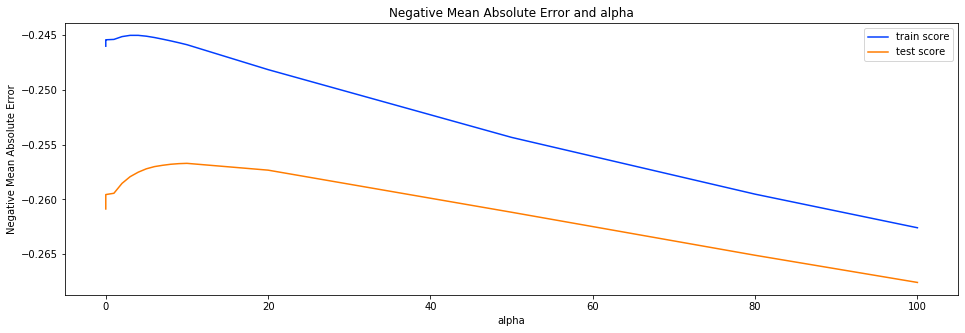

In [127]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting

plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### Since aplha is very low,let's represent x axis in logscale


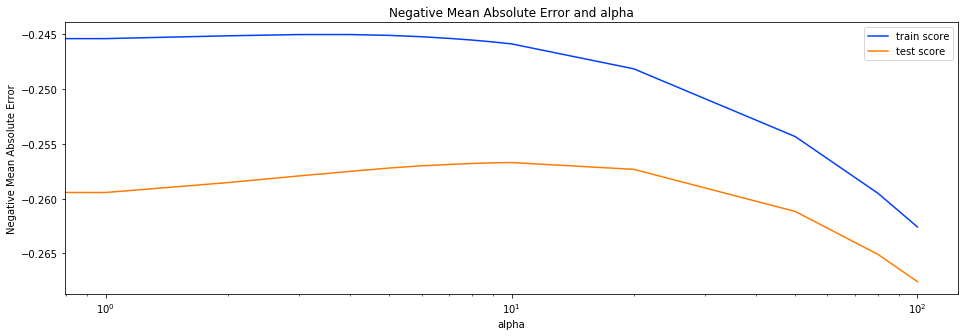

In [128]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.xscale('log')
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [129]:
ridge_alpha = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.27604502,  0.1334723 ,  0.12454523,  0.30020664,  0.21667794,
        0.17418005, -0.30305052, -0.24611279, -0.11506382,  0.1200474 ,
       -0.08372026,  0.22662991, -0.19039692, -0.1848849 ,  0.13744991,
        0.18329842, -0.12620962,  0.14178867,  0.1075271 , -0.06092467,
       -0.08421185, -0.0450916 , -0.20903538, -0.01232373,  0.02958326,
       -0.1173102 ,  0.13676303, -0.18081106, -0.15782298, -0.19539452])

In [130]:
#lets predict the R-squared value of test and train data
from sklearn import metrics
y_train_pred = ridge.predict(X_train)


In [131]:

y_test_pred = ridge.predict(X_test)

##r2 score on train data
ridge_train_r2=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
##r2 score on test data
ridge_test_r2=metrics.r2_score(y_true=y_test,y_pred=y_test_pred)

print("For Ridge regression r2 value on train data:", round(ridge_train_r2,2))
print("For Ridge regression r2 value on test data:", round(ridge_test_r2,2))

For Ridge regression r2 value on train data: 0.87
For Ridge regression r2 value on test data: 0.86


In [132]:
from sklearn.metrics import mean_squared_error
print ('RMSE for ridge regression:', round(mean_squared_error(y_test, y_test_pred),2))

RMSE for ridge regression: 0.14


In [133]:
from sklearn.metrics import mean_squared_error
print ('RMSE for ridge regression:', round(mean_squared_error(y_test, y_test_pred),3))

RMSE for ridge regression: 0.14


In [134]:
from sklearn.metrics import mean_squared_error
print ('RMSE for ridge regression:', mean_squared_error(y_test, y_test_pred))

RMSE for ridge regression: 0.1401339281543022


In [135]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols =col
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']


In [136]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
4               2ndFlrSF  0.300207
1            OverallCond  0.276045
12  Neighborhood_Edwards  0.226630
5             GarageCars  0.216678
16  Neighborhood_OldTown  0.183298
6        MSZoning_Others  0.174180
18      RoofStyle_Others  0.141789
15  Neighborhood_NridgHt  0.137450
27      BsmtFinType1_Unf  0.136763
2               BsmtQual  0.133472

## Lasso regression

In [137]:
lasso = Lasso()

# list of alphas to tune
param_alpha = {'alpha': [0.0001, 0.0002,0.0005,0.001, 0.002,0.003,0.005,0.009,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,50.0,80.0,100.0]}  

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = param_alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.003,
                                   0.005, 0.009, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006582      0.000489         0.002794        0.000400      0.0001   
1       0.005784      0.001163         0.002593        0.000798      0.0002   
2       0.004588      0.000489         0.002592        0.000488      0.0005   
3       0.004786      0.001596         0.002992        0.000631       0.001   
4       0.003990      0.000630         0.002393        0.001017       0.002   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.249725          -0.282088          -0.272751   
1  {'alpha': 0.0002}          -0.249296          -0.282051          -0.271935   
2  {'alpha': 0.0005}          -0.248509          -0.281756          -0.269528   
3   {'alpha': 0.001}          -0.248717          -0.279265          -0.267383   
4   {'alpha': 0.002}          -0.249294          -0.275808          -0.264371   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.241000          -0.257007        -0.260514        0.014998   
1          -0.240707          -0.257125        -0.260223        0.014990   
2          -0.240657          -0.257341        -0.259558        0.014672   
3          -0.241182          -0.257482        -0.258806        0.013463   
4          -0.242373          -0.258560        -0.258081        0.011645   

   rank_test_score  split0_train_score  split1_train_score  \
0                6           -0.251729           -0.235109   
1                5           -0.251499           -0.234973   
2                4           -0.251063           -0.235015   
3                3           -0.251247           -0.235283   
4                1           -0.251899           -0.236620   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.240544           -0.253841           -0.247400   
1           -0.240349           -0.253539           -0.247155   
2           -0.240289           -0.252758           -0.246643   
3           -0.240712           -0.252426           -0.246484   
4           -0.242621           -0.252555           -0.246946   

   mean_train_score  std_train_score  
0         -0.245725         0.006989  
1         -0.245503         0.006938  
2         -0.245154         0.006655  
3         -0.245230         0.006464  
4         -0.246128         0.005966

In [139]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 0.002}
-0.2580813836791914


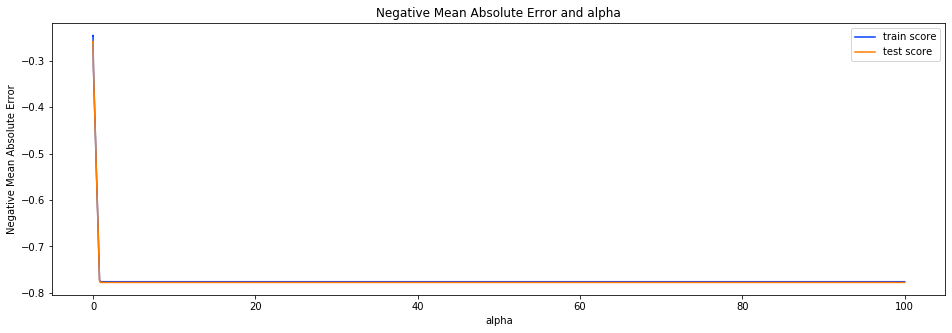

In [140]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()



#### Since aplha is very low,let's represent x axis in logscale

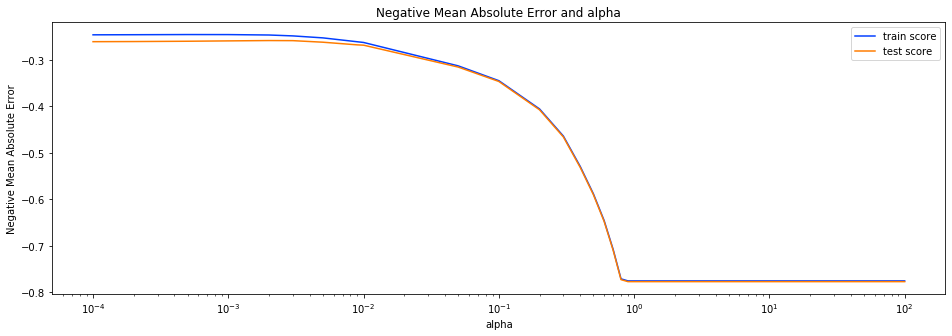

In [141]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.xscale('log')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [142]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [143]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)

In [144]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
lasso_train_r2=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
lasso_test_r2 =metrics.r2_score(y_true=y_test,y_pred=y_test_pred)
print("For Lasso regression r2 value on train data:", round(lasso_train_r2,2))
print("For Lasso regression r2 value on test data:", round(lasso_test_r2,2))

For Lasso regression r2 value on train data: 0.87
For Lasso regression r2 value on test data: 0.87


In [145]:
from sklearn.metrics import mean_squared_error
print ('RMSE for lasso regression:',round(mean_squared_error(y_test, y_test_pred),2))

RMSE for lasso regression: 0.14


In [146]:
from sklearn.metrics import mean_squared_error
print ('RMSE for lasso regression:',round(mean_squared_error(y_test, y_test_pred),3))

RMSE for lasso regression: 0.138


In [147]:
print ('RMSE for lasso regression:',mean_squared_error(y_test, y_test_pred))

RMSE for lasso regression: 0.13788710889828368


In [148]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = col
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [149]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
4               2ndFlrSF  0.302093
1            OverallCond  0.281895
12  Neighborhood_Edwards  0.232870
5             GarageCars  0.217878
6        MSZoning_Others  0.173869
16  Neighborhood_OldTown  0.167523
27      BsmtFinType1_Unf  0.134508
2               BsmtQual  0.129976
3               1stFlrSF  0.121487
18      RoofStyle_Others  0.118072

In [150]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
4               2ndFlrSF  0.300207
1            OverallCond  0.276045
12  Neighborhood_Edwards  0.226630
5             GarageCars  0.216678
16  Neighborhood_OldTown  0.183298
6        MSZoning_Others  0.174180
18      RoofStyle_Others  0.141789
15  Neighborhood_NridgHt  0.137450
27      BsmtFinType1_Unf  0.136763
2               BsmtQual  0.133472

Both Ridge and Lasso have predicted same features as most significant predictor variables:
 
Ridge Prediction:

		
4	--> 2ndFlrSF				--> 0.300207 <br>
1	--> OverallCond				--> 0.276045 <br>
12	--> Neighborhood_Edwards	--> 0.226630 <br>
5	--> GarageCars				--> 0.216678 <br>
16	--> Neighborhood_OldTown	--> 0.183298 <br>
6	--> MSZoning_Others			--> 0.174180 <br>
18	--> RoofStyle_Others		--> 0.141789 <br>
15	--> Neighborhood_NridgHt	--> 0.137450 <br>
27	--> BsmtFinType1_Unf		--> 0.136763 <br>
2	--> BsmtQual				--> 0.133472 <br>

Lasso Prediction:
        
4  -->	2ndFlrSF              --> 0.302093 <br>
1  -->	OverallCond	          --> 0.281895 <br>
12 -->	Neighborhood_Edwards  --> 0.232870 <br>
5  -->	GarageCars	          --> 0.217878<br>
6  -->	MSZoning_Others	      --> 0.173869 <br>
16 -->	Neighborhood_OldTown  --> 0.167523 <br>
27 -->	BsmtFinType1_Unf	  --> 0.134508 <br>
2  -->	BsmtQual	          --> 0.129976 <br>
3  -->	1stFlrSF              --> 0.121487 <br>
18 -->	RoofStyle_Others	  --> 0.118072 <br>


- MSZoning_Others refers to Residential High Density and Commercial zoning classification of the sale.
- RoofStyle_Others refers to either of 'SFoyer','1.5Unf','2.5Unf','2.5Fin' type of roofs

The optimal value of lambda for 

- Ridge regression - 10
- Lasso regression - 0.002

**For Ridge regression**:

1. R2 value on train data: 0.87
2. R2 value on test data: 0.86
3. RSME : 0.14


**For Lasso regression**:
1. For Lasso regression r2 value on train data: 0.87
2. For Lasso regression r2 value on test data: 0.87
3. RSME : 0.138

We can go with either of the them.

**Let’s choose Lasso as it have least RSME comparatively .It also penalizes heavily and does feature elimination to build robust and generalized model.**

Below are the top 5 most important predictor variables:

1.  2ndFlrSF              (Second floor square feet)
2.  OverallCond	          (Rates the overall condition of the house)
3.  Neighborhood_Edwards  (Refers to Physical locations near Edwards within Ames city limits)
4.  GarageCars	          (Size of garage in car capacity)
5.  MSZoning_Others	      (MSZoning_Others refers to Residential High Density and Commercial zoning classification of the sale).




## Subjective Questions- Coding

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of lambda for 

- Ridge regression - 10
- Lasso regression - 0.002

In [151]:
##Changing aplha to 20 and building new model

ridge_double = Ridge(alpha=20)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

#lets predict the R-squared value of test and train data
y_train_pred_double = ridge_double.predict(X_train)
y_test_pred_double = ridge_double.predict(X_test)

##r2 score on train and test data
ridge_train_r2_double=metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
ridge_test_r2_double=metrics.r2_score(y_true=y_test,y_pred=y_test_pred_double)

print("For Ridge regression r2 value on train data:", round(ridge_train_r2_double,2))
print("For Ridge regression r2 value on test data:", round(ridge_test_r2_double,2))
print ('RMSE for ridge regression:', round(mean_squared_error(y_test, y_test_pred_double),3))

For Ridge regression r2 value on train data: 0.87
For Ridge regression r2 value on test data: 0.86
RMSE for ridge regression: 0.14


In [152]:
model_parameter_double = list(ridge_double.coef_)
model_parameter_double.insert(0,ridge_double.intercept_)
cols =col
cols.insert(0,'constant')
ridge_double_coef = pd.DataFrame(list(zip(cols,model_parameter_double)))
ridge_double_coef.columns = ['Feaure','Coef']


In [153]:
ridge_double_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
4               2ndFlrSF  0.297780
1            OverallCond  0.283947
5             GarageCars  0.212983
12  Neighborhood_Edwards  0.181261
6        MSZoning_Others  0.178435
16  Neighborhood_OldTown  0.149180
27      BsmtFinType1_Unf  0.132633
2               BsmtQual  0.132155
3               1stFlrSF  0.126839
18      RoofStyle_Others  0.117837

In [154]:
#Changing alpha to 0.004
lasso_double = Lasso(alpha=0.004)
        
lasso_double.fit(X_train, y_train) 

#lets predict the R-squared value of test and train data
y_train_pred_double_= lasso_double.predict(X_train)
y_test_pred_double = lasso_double.predict(X_test)

lasso_train_r2_double=metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
lasso_test_r2_double=metrics.r2_score(y_true=y_test,y_pred=y_test_pred_double)
print("For lasso regression r2 value on train data:", round(lasso_train_r2_double,2))
print("For lasso regression r2 value on test data:", round(lasso_test_r2_double,2))
print ('RMSE for lasso regression:', round(mean_squared_error(y_test, y_test_pred_double),2))

For lasso regression r2 value on train data: 0.87
For lasso regression r2 value on test data: 0.87
RMSE for lasso regression: 0.14


In [155]:
model_parameter_double = list(lasso_double.coef_)
model_parameter_double.insert(0,lasso_double.intercept_)
cols =col
cols.insert(0,'constant')
lasso_double_coef = pd.DataFrame(list(zip(cols,model_parameter_double)))
lasso_double_coef.columns = ['Feaure','Coef']

In [156]:
lasso_double_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
4               2ndFlrSF  0.301408
1            OverallCond  0.299853
5             GarageCars  0.216122
6        MSZoning_Others  0.178896
12  Neighborhood_Edwards  0.155034
27      BsmtFinType1_Unf  0.132045
2               BsmtQual  0.126915
3               1stFlrSF  0.125391
16  Neighborhood_OldTown  0.097589
10         LotConfig_FR2  0.078156

We can clearly see that R2 or RSME value didn’t change when alpha is doubled for both ridge and lasso regression. But the top 5 important predictor variables have changed in ridge and reordered in lasso.

The top 5 predictor variables when we doubled alpha in ridge regression have changed as given below:

1. 2ndFlrSF 
2. OverallCond 
3. GarageCars
4. Neighborhood_Edwards
5. MSZoning_Other

The top 5 predictor variables when we doubled alpha in lasso regression have reordered as given below:
    
1. 2ndFlrSF			
2. OverallCond			
3. GarageCars			
4. MSZoning_Others
5. Neighborhood_Edwards


- MSZoning_Others refers to Residential High Density and Commercial zoning classification of the sale.

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

We got the below features as top 5 predictor variable for lasso regression:

1. 2ndFlrSF 
2. OverallCond 
3. Neighborhood_Edwards 
4. GarageCars
5. MSZoning_Others

Let's drop this 5 variables 2ndFlrSF,OverallCond,Neighborhood,GarageCars,MSZoning_Others and run the model again

In [157]:
Xcopy=X.copy() ##Copying X into new dataframe

In [158]:
Xcopy.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          4         4             1         706           0        150   
1          3         4             4         978           0        284   
2          4         4             2         486           0        434   
3          3         3             1         216           0        540   
4          4         4             3         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   
2            4             6           1            3           2         608   
3            4             7           1            4           3         642   
4            4             9           1            3           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  Age  Remodelled_Age  MSZoning_Others  MSZoning_RL  MSZoning_RM  \
0        0   17              17                0            1            0   
1        0   44              44                0            1            0   
2        0   19              18                0            1            0   
3        0  105              50                0            1            0   
4        0   20              20                0            1            0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             0             1                  0              0   
1             0             0             1                  0              1   
2             0             0             0                  0              0   
3             0             0             0                  0              0   
4             0             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_CollgCr  \
0              0                 1                     1   
1              0                 0                     0   
2              0                 1                     1   

In [159]:
##Storing all the dummified columns formed from "Neighborhood"
Neighbor_col = [col for col in Xcopy.columns if 'Neighborhood_' in col] 

In [160]:
Neighbor_col

['Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Others',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_Timber']

In [161]:
Xcopy.shape

(1460, 104)

In [162]:
Xcopy.drop(Neighbor_col,axis=1,inplace=True)

In [163]:
Xcopy.shape

(1460, 88)

In [164]:
len(Neighbor_col)

16

In [165]:
##Storing all the dummified columns formed from "MSZoning"
MSZoning_col = [col for col in Xcopy.columns if 'MSZoning_' in col]

In [166]:
MSZoning_col

['MSZoning_Others', 'MSZoning_RL', 'MSZoning_RM']

In [167]:
Xcopy.drop(MSZoning_col,axis=1,inplace=True)

In [168]:
Xcopy.drop(['2ndFlrSF','OverallCond','GarageCars'],axis=1,inplace=True)

In [169]:
Xcopy.shape

(1460, 82)

In [170]:
# Splitting the data into train and test (70%-30%)
X_traincopy, X_testcopy, y_traincopy, y_testcopy = train_test_split(Xcopy, y, train_size=0.7, test_size=0.3, random_state=100)

In [171]:
num_copy=['MSSubClass','LotFrontage','LotArea','OverallQual',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'TotalBsmtSF','1stFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'3SsnPorch','ScreenPorch','PoolArea','MiscVal','Remodelled_Age','Age',
'ExterQual','HeatingQC','KitchenQual','FireplaceQu','BsmtExposure','BsmtQual']

X_traincopy[num_copy]=scaler.fit_transform(X_traincopy[num_copy])
X_testcopy[num_copy] = scaler.transform(X_testcopy[num_copy])

In [172]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of the variable equal to 30
lm1 = LinearRegression()
lm1.fit(X_traincopy, y_traincopy)

rfe1 = RFE(lm1, 30)             # running RFE
rfe1 = rfe1.fit(X_traincopy, y_traincopy)

In [173]:
list(zip(X_traincopy.columns,rfe1.support_,rfe1.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 51),
 ('LotArea', False, 15),
 ('OverallQual', True, 1),
 ('MasVnrArea', False, 49),
 ('ExterQual', False, 31),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 11),
 ('BsmtFinSF1', False, 20),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 17),
 ('TotalBsmtSF', False, 23),
 ('HeatingQC', False, 14),
 ('1stFlrSF', False, 26),
 ('LowQualFinSF', False, 44),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 33),
 ('FullBath', False, 16),
 ('HalfBath', False, 36),
 ('BedroomAbvGr', False, 10),
 ('KitchenAbvGr', False, 34),
 ('KitchenQual', False, 7),
 ('TotRmsAbvGrd', False, 32),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 40),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 18),
 ('OpenPorchSF', False, 45),
 ('EnclosedPorch', False, 46),
 ('3SsnPorch', False, 38),
 ('ScreenPorch', False, 25),
 ('PoolArea', False, 9),
 ('MiscVal', False, 41),
 ('Age', False, 35),
 ('Remodelled_Age', True, 1),
 ('LotSha

In [174]:
newcol = X_traincopy.columns[rfe1.support_] ##forming new df with columns that have rfe support
newcol


Index(['OverallQual', 'BsmtQual', 'GrLivArea', 'BsmtFullBath', 'Fireplaces',
       'GarageArea', 'Remodelled_Age', 'LotShape_IR3', 'LotConfig_CulDSac',
       'RoofStyle_Others', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Others', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_Others', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace',
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_Others',
       'Foundation_PConc', 'BsmtFinType1_No Basement', 'GarageType_Detchd',
       'GarageType_No Garage', 'GarageType_Others', 'GarageFinish_No Garage'],
      dtype='object')

In [175]:
X_traincopy.columns[~rfe1.support_] ##columns with no rfe support 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Age', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Others', 'HouseStyle_SLvl', 'RoofStyle_Hip',
       'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_BuiltIn', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')

In [176]:
X_traincopy = X_traincopy[newcol]
X_testcopy = X_testcopy[newcol]


In [177]:
##Printing shape of X_train and X_test
print(X_traincopy.shape)
print(X_testcopy.shape)

(1021, 30)
(438, 30)


In [178]:
lassonew = Lasso()

# list of alphas to tune
param_alpha = {'alpha': [0.0001, 0.0002,0.0005,0.001, 0.002,0.003,0.005,0.009,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,50.0,80.0,100.0]}  

# cross validation
model_cv_new = GridSearchCV(estimator = lasso, 
                        param_grid = param_alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_traincopy, y_traincopy)

cv_results_new = pd.DataFrame(model_cv_new.cv_results_)
cv_results_new.head()

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    1.5s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008777      0.000977         0.003191        0.000399      0.0001   
1       0.007380      0.001197         0.002992        0.000630      0.0002   
2       0.004787      0.000747         0.001795        0.000399      0.0005   
3       0.005585      0.001493         0.002593        0.000488       0.001   
4       0.005584      0.000488         0.003192        0.000399       0.002   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.249581          -0.295581          -0.305913   
1  {'alpha': 0.0002}          -0.249349          -0.294983          -0.306132   
2  {'alpha': 0.0005}          -0.248967          -0.293398          -0.307567   
3   {'alpha': 0.001}          -0.249745          -0.295202          -0.310455   
4   {'alpha': 0.002}          -0.250273          -0.290637          -0.308887   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.257658          -0.275692        -0.276885        0.021488   
1          -0.257049          -0.275781        -0.276659        0.021613   
2          -0.256113          -0.276161        -0.276441        0.022020   
3          -0.257840          -0.277264        -0.278101        0.022603   
4          -0.257755          -0.276663        -0.276843        0.021389   

   rank_test_score  split0_train_score  split1_train_score  \
0                5           -0.273900           -0.255525   
1                3           -0.273864           -0.255575   
2                2           -0.274341           -0.256767   
3                7           -0.275775           -0.260562   
4                4           -0.277282           -0.262568   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.255718           -0.271211           -0.270921   
1           -0.255716           -0.271148           -0.271064   
2           -0.256500           -0.271481           -0.272344   
3           -0.258687           -0.273510           -0.275346   
4           -0.260530           -0.274224           -0.275929   

   mean_train_score  std_train_score  
0         -0.265455         0.008096  
1         -0.265474         0.008087  
2         -0.266287         0.007937  
3         -0.268776         0.007534  
4         -0.270107         0.007083

In [179]:
#checking the value of optimum number of parameters
print(model_cv_new.best_params_)
print(model_cv_new.best_score_)

{'alpha': 0.003}
-0.27629891112299176


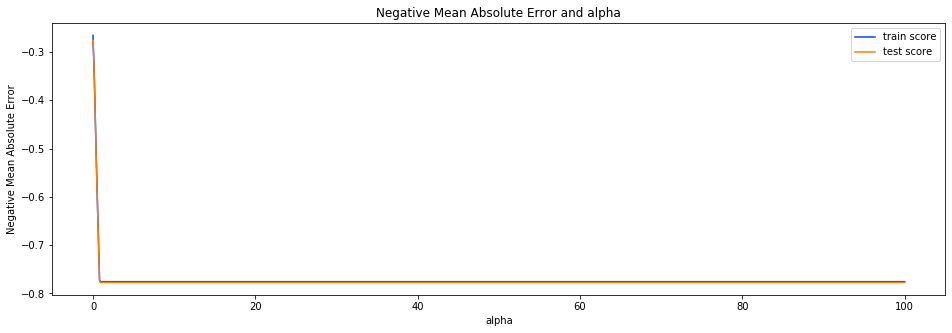

In [180]:
# plotting mean test and train scoes with alpha 
cv_results_new['param_alpha'] = cv_results_new['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

plt.plot(cv_results_new['param_alpha'], cv_results_new['mean_train_score'])
plt.plot(cv_results_new['param_alpha'], cv_results_new['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

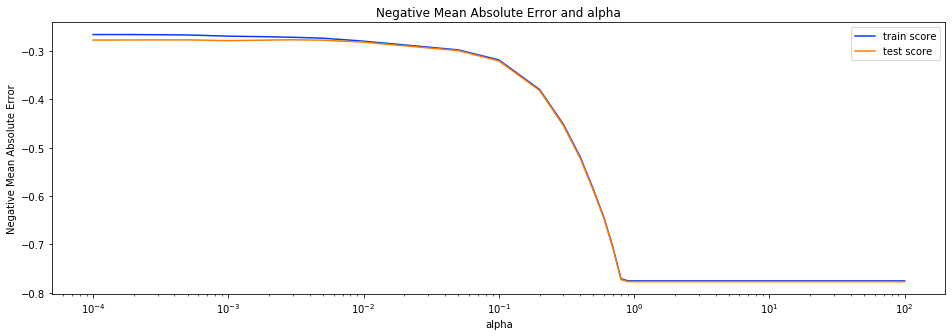

In [181]:
#### Since aplha is very low,let's represent x axis in logscale

# plotting mean test and train scoes with alpha 
cv_results_new['param_alpha'] = cv_results_new['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))

plt.xscale('log')
plt.plot(cv_results_new['param_alpha'], cv_results_new['mean_train_score'])
plt.plot(cv_results_new['param_alpha'], cv_results_new['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()



In [182]:
alpha_new = model_cv_new.best_params_['alpha']

lasso_new = Lasso(alpha=alpha_new)
        
lasso_new.fit(X_traincopy, y_traincopy) 


Lasso(alpha=0.003)

In [183]:
#lets predict the R-squared value of test and train data
y_train_pred_new = lasso_new.predict(X_traincopy)

#lets predict the R-squared value of test and train data
y_test_pred_new = lasso_new.predict(X_testcopy)

lasso_train_r2_new=metrics.r2_score(y_true=y_train, y_pred=y_train_pred_new)
lasso_test_r2_new=metrics.r2_score(y_true=y_test,y_pred=y_test_pred_new)
print("For lasso regression r2 value on train data:", round(lasso_train_r2_new,2))
print("For lasso regression r2 value on test data:", round(lasso_test_r2_new,2))
print ('RMSE for lasso regression:', round(mean_squared_error(y_test, y_test_pred_new),2))

For lasso regression r2 value on train data: 0.84
For lasso regression r2 value on test data: 0.83
RMSE for lasso regression: 0.18


We can clearly see that the model performance have decreased significantly when we drop top 5 important predictor variables. 
- ***On train data it decreased from 87% to 84% and from 87% to 83 % on test data.***
- ***Also RSME have increased from 0.14 to 0.18***

In [184]:
model_param_new = list(lasso_new.coef_)
model_param_new.insert(0,lasso_new.intercept_)
newcols = newcol
newcols.insert(0,'const')
lasso_new_coef = pd.DataFrame(list(zip(newcols,model_param_new)))
lasso_new_coef.columns = ['Featuere','Coef']

lasso_new_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
1                   BsmtQual  0.310825
3               BsmtFullBath  0.273001
6             Remodelled_Age  0.155458
9           RoofStyle_Others  0.116896
5                 GarageArea  0.108770
4                 Fireplaces  0.093708
25  BsmtFinType1_No Basement  0.080835
2                  GrLivArea  0.080263
23         Foundation_Others  0.064991
0                OverallQual  0.021115

The new top 5 most important predictor variables are:
    
1. BsmtQual (Evaluates the height of the basement)      
2. BsmtFullBath  (Basement full bathrooms)  
3. Remodelled_Age Remodelled Age is calculated by subtracting from Remodel date from 2020 (same as construction date if no remodelling or addition)
4. RoofStyle_Others(RoofStyle_Others refers to either of 'SFoyer','1.5Unf','2.5Unf','2.5Fin' type of roofs)
5. GarageArea (Size of garage in square feet)



---------------------------------------------------------------------------------------------------------------------